In [1]:
import sklearn
import pandas as pd
import numpy as np

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [3]:
names = pd.read_csv("../Ml/data.csv", sep=',', 
     names=["First_Name", "Second_Name", "Third_Name", "Gender"])

names

,First_Name,Second_Name,Third_Name,Gender
0,АБАБИЙ,АНДРЕЙ,ВАСИЛЬЕВИЧ,М
1,АБАБИЛОВ,ДМИТРИЙ,НИКОЛАЕВИЧ,М
2,АБАБИЛОВ,ВЛАДИМИР,ИВАНОВИЧ,М
3,АБАБИЛОВ,СЕРГЕЙ,ИВАНОВИЧ,М
4,АБАБИЛОВ,ЮРИЙ,ВЛАДИМИРОВИЧ,М
...,...,...,...,...
6228603,ИЩЕНКО,МАЙЯ,АННАДУРДЫЕВНА,Ж
6228604,КОСТЮШИНА,НАТАЛИЯ,ВЯЧЕСЛАВОВНА,Ж
6228605,КАСАТКИНА,ТАТЬЯНА,ВЛАДИМИРОВНА,Ж
6228606,МАКСАКОВА,ГАЛИНА,ГЕОРГИЕВНА,Ж


In [4]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6228608 entries, 0 to 6228607
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   First_Name   object
 1   Second_Name  object
 2   Third_Name   object
 3   Gender       object
dtypes: object(4)
memory usage: 190.1+ MB


In [5]:
names.describe(include='all')

,First_Name,Second_Name,Third_Name,Gender
count,6228597,6228554,6225770,6228608
unique,383445,45199,81009,8
top,ИВАНОВА,АЛЕКСАНДР,АЛЕКСАНДРОВНА,Ж
freq,24285,271380,310929,3505323


In [6]:
names.duplicated().sum()

2006516

In [7]:
gender_val = names['Gender'].value_counts()
gender_val

Ж     3505323
М     2723277
ФИ          2
Л.          2
ЗИ          1
ТУ          1
НА          1
Д           1
Name: Gender, dtype: int64

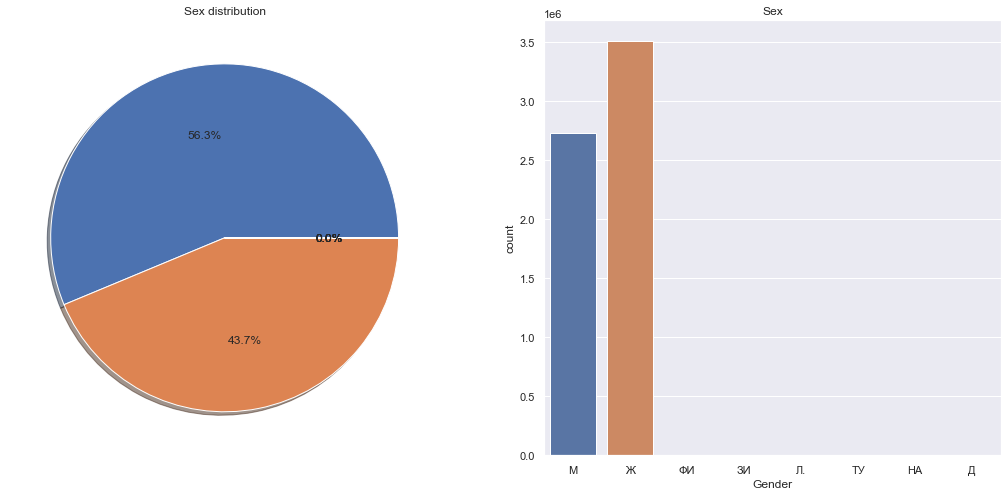

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid')
f, ax = plt.subplots(1, 2, figsize=(18, 8))
ax[0].pie(x=gender_val, autopct='%1.1f%%', shadow=True)

ax[0].set_title('Sex distribution')
ax[0].set_ylabel('')

sns.countplot(x='Gender', data=names, ax=ax[1])
ax[1].set_title('Sex')
plt.show()

In [13]:
males = names.loc[names['Gender'] == 'М']
females = names.loc[names['Gender'] == 'Ж']

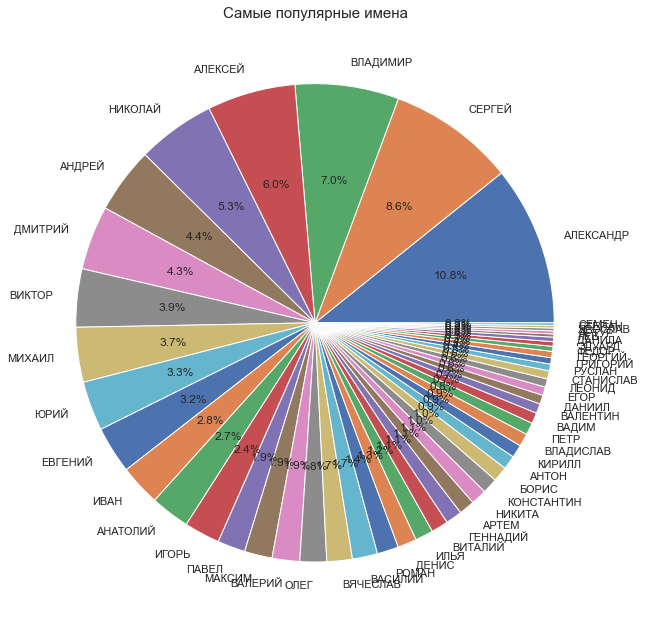

In [14]:
labels = males['Second_Name'].value_counts().index[:50]
sizes = males['Second_Name'].value_counts().values[:50]
plt.figure(figsize=(11,11))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Самые популярные имена", size=15)
plt.show()

In [15]:
labels = males['Second_Name'].value_counts().index[-50:]
sizes = males['Second_Name'].value_counts().values[-50:]
unpopular_names = pd.DataFrame({'labels': labels, 'sizes': sizes})
unpopular_names

,labels,sizes
0,ШИНБОЛАТ,1
1,МИРЗОИМАД,1
2,ХАФЕЗ,1
3,НЮРИК,1
4,МАЪРИФ,1
5,ГЮЛЬГАДАР,1
6,АЛЕТДИН,1
7,КАЗЕМИРАС,1
8,ЧАРАБУЛА,1
9,БАЯНУУР,1


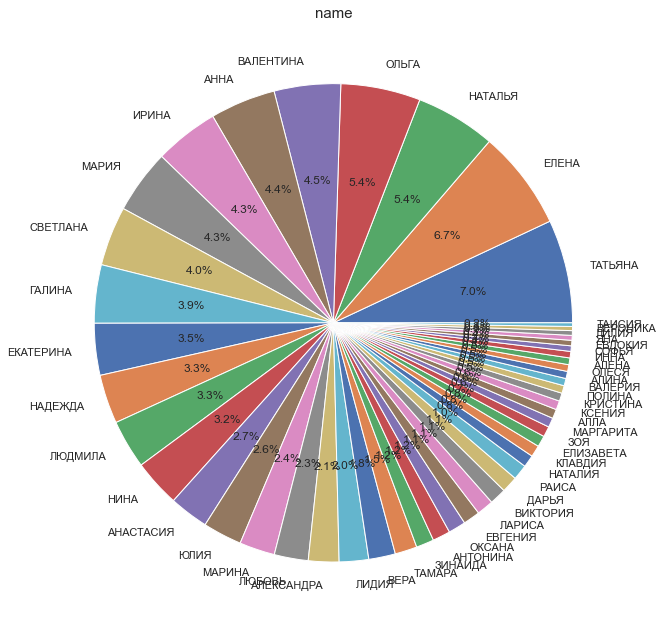

In [16]:
labels = females['Second_Name'].value_counts().index[:50]
sizes = females['Second_Name'].value_counts().values[:50]
plt.figure(figsize=(11,11))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("name", size=15)
plt.show()

In [17]:
labels = females['Second_Name'].value_counts().index[-50:]
sizes = females['Second_Name'].value_counts().values[-50:]
unpopular_names = pd.DataFrame({'labels': labels, 'sizes': sizes})
unpopular_names

,labels,sizes
0,ГАЛИКАСВАПНА,1
1,МОРИЯ,1
2,ГОЛФЯР,1
3,НАСИМИ,1
4,ЗЕЛЬКАБИРА,1
5,НЯЗОФЕ,1
6,АЙНИСЕ,1
7,ТОЙГАЛЧЕ,1
8,ЗАЗАЙ,1
9,НУРЬЯН,1


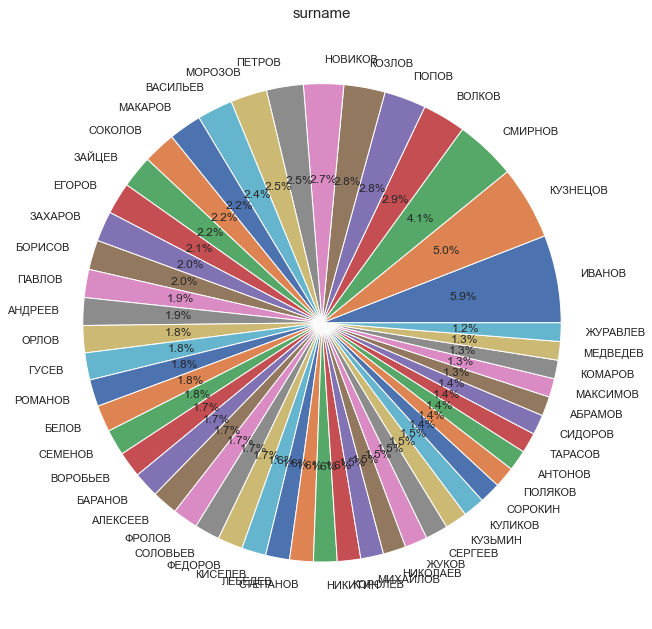

In [18]:
labels = males['First_Name'].value_counts().index[:50]
sizes = males['First_Name'].value_counts().values[:50]
plt.figure(figsize=(11,11))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("surname", size=15)
plt.show()

In [19]:
labels = males['First_Name'].value_counts().index[-50:]
sizes = males['First_Name'].value_counts().values[-50:]
unpopular_surnames = pd.DataFrame({'labels': labels, 'sizes': sizes})
unpopular_surnames

,labels,sizes
0,НИКОГДА,1
1,ШУАКБАЕВ,1
2,АЮЧАТОВ,1
3,ШИТИМИРОВ,1
4,ЯРУШЕВСКИЙ,1
5,МЫСЬ,1
6,ЛОУС,1
7,ЛАБУГИН,1
8,ПОТАМАН,1
9,ЖЕЛТЕНОВ,1


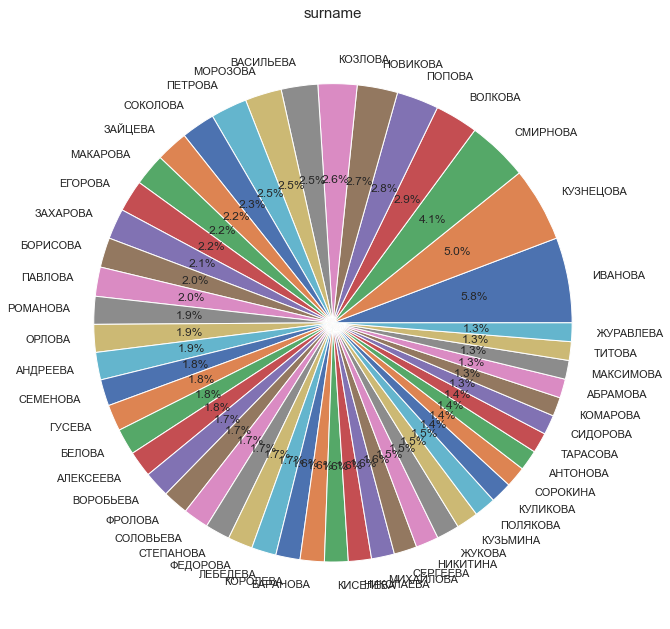

In [20]:
labels = females['First_Name'].value_counts().index[:50]
sizes = females['First_Name'].value_counts().values[:50]
plt.figure(figsize=(11,11))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("surname", size=15)
plt.show()

In [21]:
labels = females['First_Name'].value_counts().index[-50:]
sizes = females['First_Name'].value_counts().values[-50:]
unpopular_surnames = pd.DataFrame({'labels': labels, 'sizes': sizes})
unpopular_surnames

,labels,sizes
0,ИСТОИИНА,1
1,СЕКРЕТА,1
2,АКОПДХАНЯН,1
3,ЧЕКАЙ,1
4,КЕРСАГИНА,1
5,ГАРНШИНА,1
6,НИЗОКОВА,1
7,КАЛТЫПИНА,1
8,МАКАРОВА-ЗЕМЛЯНСКАЯ,1
9,СМОЛЯНЮК,1


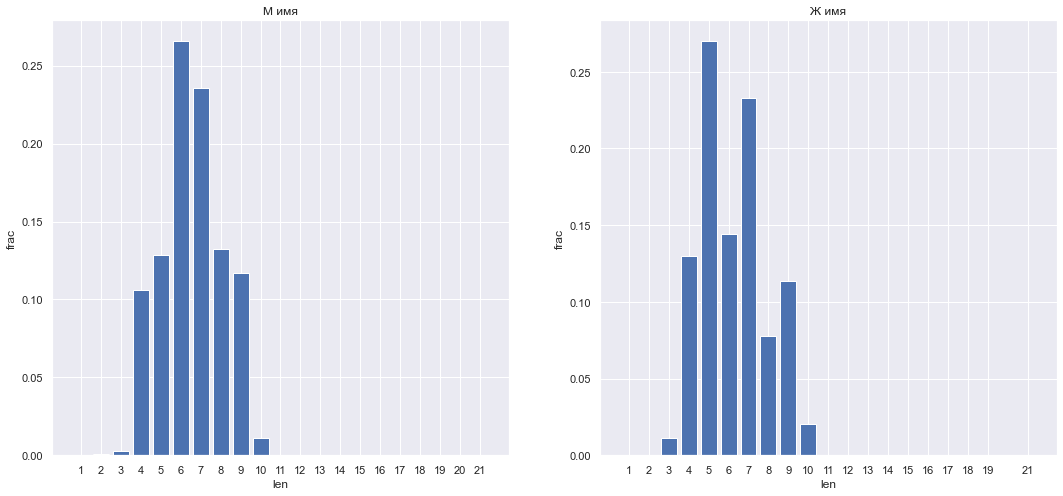

In [22]:
##Length of names
male_lengths = males['Second_Name'].str.len().value_counts()
female_lengths = females['Second_Name'].str.len().value_counts()
f, ax = plt.subplots(1, 2,  figsize=(18, 8))
ax[0].bar(male_lengths.index, male_lengths.values / males.shape[0])
ax[0].set_xticks(male_lengths.index)
ax[0].set_title('М имя')
ax[0].set_xlabel('len')
ax[0].set_ylabel('frac')
ax[1].bar(female_lengths.index, female_lengths.values / females.shape[0])
ax[1].set_xticks(female_lengths.index)
ax[1].set_title('Ж имя')
ax[1].set_xlabel('len')
ax[1].set_ylabel('frac')
plt.show()

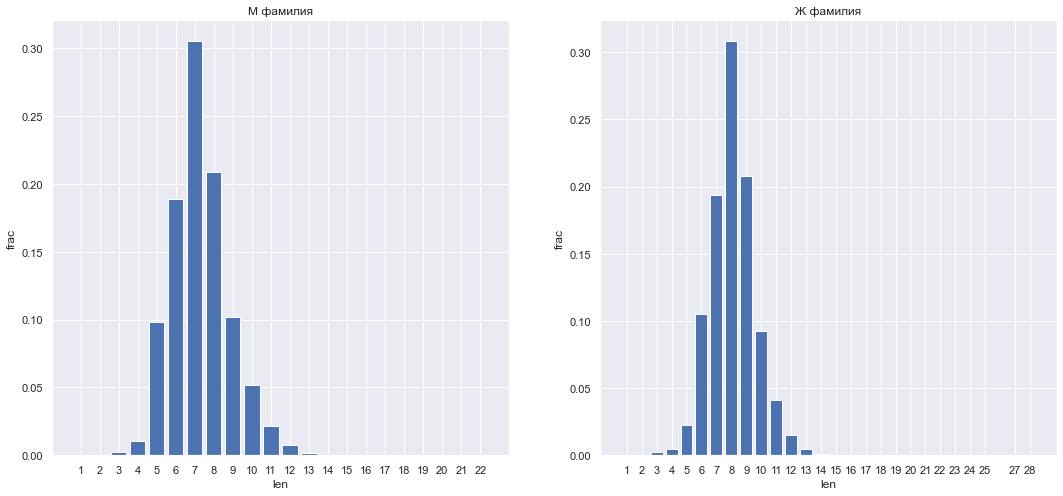

In [23]:
##Second name length
male_lengths = males['First_Name'].str.len().value_counts()
female_lengths = females['First_Name'].str.len().value_counts()
f, ax = plt.subplots(1, 2,  figsize=(18, 8))
ax[0].bar(male_lengths.index, male_lengths.values / males.shape[0])
ax[0].set_xticks(male_lengths.index)
ax[0].set_title('М фамилия')
ax[0].set_xlabel('len')
ax[0].set_ylabel('frac')
ax[1].bar(female_lengths.index, female_lengths.values / females.shape[0])
ax[1].set_xticks(female_lengths.index)
ax[1].set_title('Ж фамилия')
ax[1].set_xlabel('len')
ax[1].set_ylabel('frac')
plt.show()

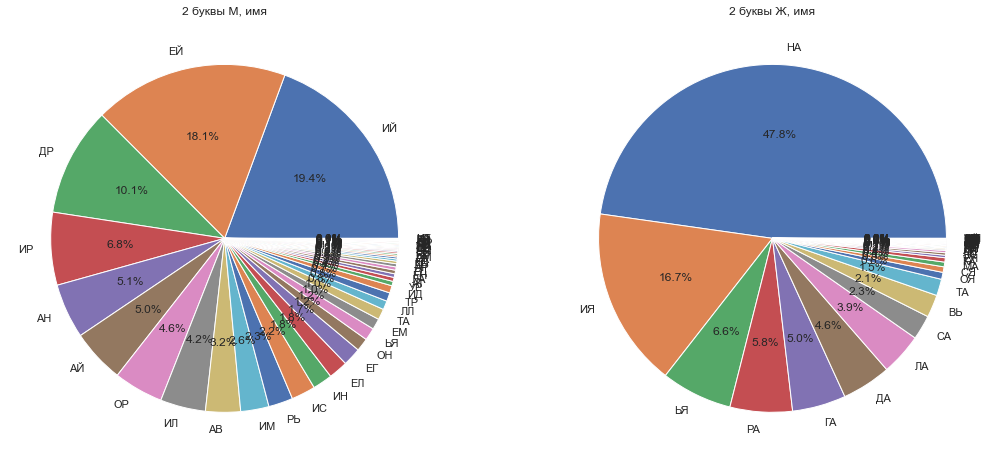

In [24]:
#Last simbols of name
male_ends = males['Second_Name'].apply(lambda x: x[-2:] if type(x) is str else x).value_counts()[:50]
female_ends = females['Second_Name'].apply(lambda x: x[-2:] if type(x) is str else x).value_counts()[:50]
f, ax = plt.subplots(1, 2,  figsize=(18, 8))
ax[0].pie(male_ends.values, labels=male_ends.index, autopct="%1.1f%%")
ax[0].set_title('2 буквы М, имя')
ax[1].pie(female_ends.values, labels=female_ends.index, autopct="%1.1f%%")
ax[1].set_title('2 буквы Ж, имя')
plt.show()

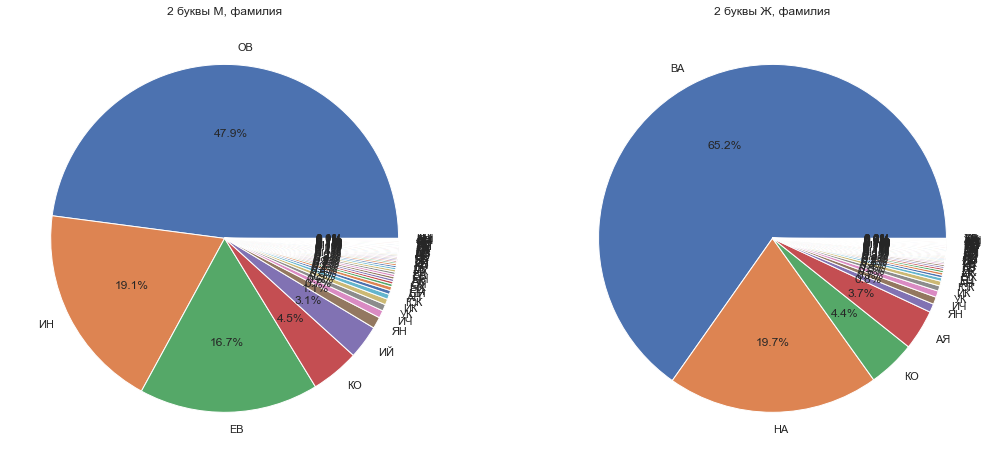

In [26]:
##Last simbols of second name
male_ends = males['First_Name'].apply(lambda x: x[-2:] if type(x) is str else x).value_counts()[:50]
female_ends = females['First_Name'].apply(lambda x: x[-2:] if type(x) is str else x).value_counts()[:50]
f, ax = plt.subplots(1, 2,  figsize=(18, 8))
ax[0].pie(male_ends.values, labels=male_ends.index, autopct="%1.1f%%")
ax[0].set_title('2 буквы М, фамилия')
ax[1].pie(female_ends.values, labels=female_ends.index, autopct="%1.1f%%")
ax[1].set_title('2 буквы Ж, фамилия')
plt.show()

In [28]:
##frec of vowel 
vowels = set('ЁУЕЫАОЭЯИЮ')
def eval_vowel_num(string):
    return sum([*map(lambda x: string.count(x), vowels)])

def eval_vowel_ratio(string):
    if type(string) != str:
        return 0
    return eval_vowel_num(string.upper()) / len(string)

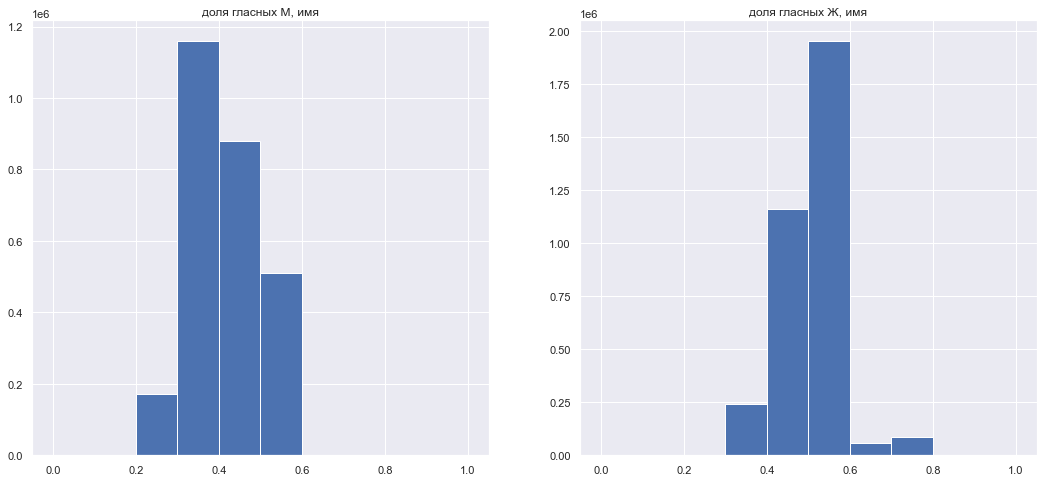

In [30]:
##in names
male_vowel_counts = males['Second_Name'].apply(eval_vowel_ratio)
female_vowel_counts = females['Second_Name'].apply(eval_vowel_ratio)
f, ax = plt.subplots(1, 2,  figsize=(18, 8))
ax[0].hist(male_vowel_counts)
ax[0].set_title('доля гласных М, имя')
ax[1].hist(female_vowel_counts)
ax[1].set_title('доля гласных Ж, имя')
plt.show()

In [31]:
##preparing data
dataset = names.copy()

In [32]:
dataset = dataset.loc[dataset['Gender'].isin(('М', 'Ж'))]

In [33]:
##remove duplicates
print(dataset.shape)
dataset = dataset.drop_duplicates()
dataset.shape

(6228600, 4)


(4222086, 4)

In [36]:
##delete "spaces", up regiser, exchange 'Ё ' -> 'Е'
import re
preprocess_str = lambda x: re.sub(r'\s+ ', '', str(x).upper()).replace('Ё', 'Е')

In [37]:
dataset['First_Name'] = dataset['First_Name'].apply(preprocess_str)
dataset['Second_Name'] = dataset['Second_Name'].apply(preprocess_str)


In [38]:
##drop rows with not cirillic symbols
def is_cirillic(string):
    return bool(re.search('^([А-Я]+\-?[А-Я]+)?$', str(string)))

In [39]:
dataset = dataset[dataset['Second_Name'].apply(is_cirillic)]
dataset = dataset[dataset['First_Name'].apply(is_cirillic)]

In [40]:
##exchange null values to '~1'
dataset.fillna('~1', inplace=True)

In [42]:
##encode gender types
dataset['Gender'] = dataset['Gender'].apply(lambda x: int(x == 'М'))

In [43]:
##drop father name 
dataset = dataset.drop(['Third_Name'], axis=1)

In [45]:
##save prepared dataset
dataset.to_csv('preprocessed_nofeatures.csv', index=False)

In [46]:
##strategy is to take two last symbols of name and second name + freq of vowels as features 

In [48]:
coded = dataset.copy()

In [49]:
coded['vowel_rate'] = coded['Second_Name'].apply(eval_vowel_ratio)

In [50]:
coded['surend'] = coded['First_Name'].apply(lambda x: x[-2:])
coded['nameend'] = coded['Second_Name'].apply(lambda x: x[-2:])

coded['num_let_sur'] = coded['First_Name'].apply(lambda x: len(x))
coded['num_let_nam'] = coded['Second_Name'].apply(lambda x: len(x))

coded

,First_Name,Second_Name,Gender,vowel_rate,surend,nameend,num_let_sur,num_let_nam
0,АБАБИЙ,АНДРЕЙ,1,0.333333,ИЙ,ЕЙ,6,6
1,АБАБИЛОВ,ДМИТРИЙ,1,0.285714,ОВ,ИЙ,8,7
2,АБАБИЛОВ,ВЛАДИМИР,1,0.375000,ОВ,ИР,8,8
3,АБАБИЛОВ,СЕРГЕЙ,1,0.333333,ОВ,ЕЙ,8,6
4,АБАБИЛОВ,ЮРИЙ,1,0.500000,ОВ,ИЙ,8,4
...,...,...,...,...,...,...,...,...
6228558,КСЕНДА,ГРИГОРИЙ,1,0.375000,ДА,ИЙ,6,8
6228571,МЕЩЕРЯКОВА,АЛЕНА,0,0.600000,ВА,НА,10,5
6228584,ШЕСТОПЕРОВ,ИВАН,1,0.500000,ОВ,АН,10,4
6228601,СЕМЕНОВА,ЕФРОСИНЬЯ,0,0.444444,ВА,ЬЯ,8,9


In [51]:
##save featured dataset
coded.to_csv('preprocessed_features_letter.csv', index=False)

In [52]:
##encode ending of second name as Norm
from functools import reduce
def string_norm(min_letter, string):
  return reduce(lambda prev, cur: prev + cur ** 2, map(lambda x: ord(x) - ord(min_letter) + 1, string))

In [53]:
numeric = coded.copy()

In [54]:
from functools import partial
string_norm_app = partial(string_norm, 'А')

In [55]:
numeric['nameend'] = coded['nameend'].apply(string_norm_app)
numeric['surend'] = coded['surend'].apply(string_norm_app)

In [56]:
pd.isnull(numeric).sum()

First_Name     0
Second_Name    0
Gender         0
vowel_rate     0
surend         0
nameend        0
num_let_sur    0
num_let_nam    0
dtype: int64

In [57]:
numeric.to_csv('preprocessed_features.csv', index=False)

In [58]:
numeric = pd.read_csv("preprocessed_features.csv")

In [59]:
y = numeric['Gender']
# 
X = numeric[['First_Name', 'Second_Name', 'vowel_rate', 'surend', 'nameend', 'num_let_sur', 'num_let_nam']]

In [60]:
X.head(10)

,First_Name,Second_Name,vowel_rate,surend,nameend,num_let_sur,num_let_nam
0,АБАБИЙ,АНДРЕЙ,0.333333,109,106,6,6
1,АБАБИЛОВ,ДМИТРИЙ,0.285714,24,109,8,7
2,АБАБИЛОВ,ВЛАДИМИР,0.375000,24,298,8,8
3,АБАБИЛОВ,СЕРГЕЙ,0.333333,24,106,8,6
4,АБАБИЛОВ,ЮРИЙ,0.500000,24,109,8,4
5,АБАБИЛОВ,АЛЕКСЕЙ,0.428571,24,106,8,7
6,АБАБИЛОВ,ВАСИЛИЙ,0.428571,24,109,8,7
7,АБАБИЛОВ,СЕРГЕЙ,0.333333,24,106,8,6
8,АБАБИЛОВ,ЛЕОНИД,0.500000,24,34,8,6
9,АБАБИЛОВА,НИНА,0.500000,4,15,9,4


In [61]:
from sklearn.model_selection import train_test_split

X_train_w, X_test_w, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1810)

In [62]:
indices = ['vowel_rate', 'surend', 'nameend', 'num_let_sur', 'num_let_nam']
X_train = X_train_w[indices]
X_test = X_test_w[indices]

In [63]:
X_train, ind = np.unique(X_train, return_index=True, axis=0)
y_train = np.take(y_train, ind, axis=0)

In [64]:
print(X.shape)
print(X_train.shape) 
print(X_test.shape)

(4220822, 7)
(102047, 5)
(844165, 5)


In [66]:
##Desicion Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

dt_model = DecisionTreeClassifier(max_depth=4, criterion='entropy')
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print(f'accuracy = {accuracy_score(y_pred, y_test)}')
print(f'precision = {precision_score(y_pred, y_test)}')
print(f'recall = {recall_score(y_pred, y_test)}')
print(f'f1_score = {f1_score(y_pred, y_test)}')

C:\Users\qte0619\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


accuracy = 0.9800915697760509
precision = 0.9760546221299953
recall = 0.9788853233797447
f1_score = 0.9774679233646615


In [69]:
##Logistic regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)
print(f'accuracy = {accuracy_score(y_pred, y_test)}')
print(f'precision = {precision_score(y_pred, y_test)}')
print(f'recall = {recall_score(y_pred, y_test)}')
print(f'f1_score = {f1_score(y_pred, y_test)}')

C:\Users\qte0619\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


accuracy = 0.7382656234266998
precision = 0.8820269094316888
recall = 0.6506294662079154
f1_score = 0.7488602225336648


In [70]:
##Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, max_depth=4, criterion='entropy')
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print(f'accuracy = {accuracy_score(y_pred, y_test)}')
print(f'precision = {precision_score(y_pred, y_test)}')
print(f'recall = {recall_score(y_pred, y_test)}')
print(f'f1_score = {f1_score(y_pred, y_test)}')

C:\Users\qte0619\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


accuracy = 0.9698648960807426
precision = 0.9534239239574269
recall = 0.9779086245344992
f1_score = 0.9655110703783492


In [80]:
##XGBoost
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=1810, max_depth=4, n_estimators=10)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print(f'accuracy = {accuracy_score(y_pred, y_test)}')
print(f'precision = {precision_score(y_pred, y_test)}')
print(f'recall = {recall_score(y_pred, y_test)}')
print(f'f1_score = {f1_score(y_pred, y_test)}')

C:\Users\qte0619\PycharmProjects\pythonProject\venv\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\qte0619\PycharmProjects\pythonProject\venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:40:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\qte0619\PycharmProjects\pythonProject\venv\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


accuracy = 0.988241635225341
precision = 0.9834848383425933
recall = 0.9898723943244445
f1_score = 0.9866682784000861


In [81]:
##LightGBM
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

y_pred = lgb_model.predict(X_test)
probes = lgb_model.predict_proba(X_test)

print(f'accuracy = {accuracy_score(y_pred, y_test)}')
print(f'precision = {precision_score(y_pred, y_test)}')
print(f'recall = {recall_score(y_pred, y_test)}')
print(f'f1_score = {f1_score(y_pred, y_test)}')

accuracy = 0.9937926827101337
precision = 0.9935149608407524
recall = 0.992462640857408
f1_score = 0.9929885220500277


In [82]:
processed = X_test_w.copy()

In [83]:
processed['expected'] = y_test

In [84]:
processed['predicted'] = probes[:, 1]

In [85]:
processed['error'] = np.abs(processed['expected'] - processed['predicted'])

In [86]:
processed

,First_Name,Second_Name,vowel_rate,surend,nameend,num_let_sur,num_let_nam,expected,predicted,error
481523,КУЛЕШОВ,ЮРИЙ,0.500000,24,109,7,4,1,0.998256,0.001744
3812835,БУХТИЯР,АЛЕКСАНДР,0.333333,321,294,7,9,1,0.984138,0.015862
947631,ЧУГУНОВ,ВАЛЕРИЙ,0.428571,24,109,7,7,1,0.998561,0.001439
185698,ГЕРЦ,ГЕРМАН,0.333333,546,197,4,6,1,0.968579,0.031421
2793105,КОНОНЕНКО,МАРИЯ,0.600000,236,1033,9,5,0,0.008950,0.008950
...,...,...,...,...,...,...,...,...,...,...
760122,САМОХВАЛОВ,АЛЕКСЕЙ,0.428571,24,106,10,7,1,0.998665,0.001335
3106439,СКУРИДИНА,ЛАРИСА,0.500000,15,19,9,6,0,0.050744,0.050744
3100752,КУРАШИН,СЕРГЕЙ,0.333333,205,106,7,6,1,0.997829,0.002171
3672169,ШЕРШНЕВ,ЮРИЙ,0.500000,15,109,7,4,1,0.988850,0.011150


In [87]:
processed_sorted = processed.sort_values(by='error')

In [89]:
##Lowest mistakes
processed_sorted[:20]

,First_Name,Second_Name,vowel_rate,surend,nameend,num_let_sur,num_let_nam,expected,predicted,error
3362242,ТРАПЕЗНИКОВ,ГЛЕБ,0.25,24,10,11,4,1,0.999318,0.000682
3624297,ЛОПАТНИКОВ,ГЛЕБ,0.25,24,10,10,4,1,0.999318,0.000682
2863763,РЯБЕЧЕНКОВ,ГЛЕБ,0.25,24,10,10,4,1,0.999318,0.000682
2771767,ДОЛГОБОРОДОВ,ГЛЕБ,0.25,24,10,12,4,1,0.999318,0.000682
4029881,СЕРЕБРЯКОВ,ГЛЕБ,0.25,24,10,10,4,1,0.999318,0.000682
3286151,МАКСИМЕНКОВ,ГЛЕБ,0.25,24,10,11,4,1,0.999318,0.000682
974769,ШИРОКОЛОБОВ,ГЛЕБ,0.25,24,10,11,4,1,0.999318,0.000682
1545230,СИДЕЛЬНИКОВ,ГЛЕБ,0.25,24,10,11,4,1,0.999318,0.000682
3107143,ШИШЛЯННИКОВ,ГЛЕБ,0.25,24,10,11,4,1,0.999318,0.000682
3310909,ХРОМЧЕНКОВ,ГЛЕБ,0.25,24,10,10,4,1,0.999318,0.000682


In [90]:
##Hiest mistakes
processed_sorted[-20:]

,First_Name,Second_Name,vowel_rate,surend,nameend,num_let_sur,num_let_nam,expected,predicted,error
741363,РУСИНОВ,ЕВГЕНИЙ,0.428571,24,109,7,7,0,0.998561,0.998561
2518312,ХОМЯКОВ,ВАСИЛИЙ,0.428571,24,109,7,7,0,0.998561,0.998561
1596512,РУНКОВ,АЛЕКСЕЙ,0.428571,24,106,6,7,0,0.998561,0.998561
1732782,КУПЦОВ,ВАЛЕРИЙ,0.428571,24,109,6,7,0,0.998561,0.998561
1831481,БАЛАШОВ,ЕВГЕНИЙ,0.428571,24,109,7,7,0,0.998561,0.998561
2174883,ЗАМАНОВ,ВАЛЕРИЙ,0.428571,24,109,7,7,0,0.998561,0.998561
2031045,ГОНЧАРОВ,ВИТАЛИЙ,0.428571,24,109,8,7,0,0.998561,0.998561
4052308,ЛУКАНОВ,ВАЛЕРИЙ,0.428571,24,109,7,7,0,0.998561,0.998561
1780629,АНТИПОВ,ВАСИЛИЙ,0.428571,24,109,7,7,0,0.998561,0.998561
1732243,КОЗЛОВ,ВЯЧЕСЛАВ,0.375000,24,10,6,8,0,0.998570,0.998570


In [94]:
##try to fix by preprocess features
def preprocess(surname, name):
    surname_n = preprocess_str(surname)[-2:]
    name_n = preprocess_str(name)[-2:]
    vowel_rate = eval_vowel_ratio(name)
    num_let_sur = len(surname)
    num_let_nam = len(name)
    return np.array([
        vowel_rate, 
        string_norm_app(surname_n), 
        string_norm_app(name_n),  
        num_let_sur, 
        num_let_nam, 
    ])

In [96]:
vector = preprocess('ЧУРИКОВ', 'СЕРГЕЙ').reshape(1, -1)
print(dt_model.predict(vector))
print(lr_model.predict(vector))

[1]
[0.83470678]


In [97]:
vector = preprocess('МИХАЙЛОВА', 'АНАСТАСИЯ').reshape(1, -1)
print(dt_model.predict(vector))
print(lr_model.predict(vector))
print(lr_model.predict(vector))
print(rf_model.predict(vector))
print(xgb_model.predict(vector))
print(lgb_model.predict(vector))

[0]
[0.10166996]
[0.10166996]
[0]
[0]
[0]


In [99]:
##Save model
import pickle
filename = 'Gender_Classifier.sav'
pickle.dump(lgb_model, open(filename, 'wb'))

In [102]:
##Load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(vector)
print(result)

[0]
